## Fundamentals


### Evaluating polynomials

Take-aways

- Efficient ways to compute polynomials
  - Horner's algorithm
- Computational ways of thinking
  - They are often different from mathematics.
  - They are often non-obvious.

#### Horner's algorithm

##### Devising

**Method 1** (Simplest way)

To make the discussion concrete, fix a polynomial

$$
p(x) = 2 x^4+3 x^3-3 x^2+5 x-1
$$

Plug in $1/2$

$$
P\left(\frac{1}{2}\right)=2 * \frac{1}{2} * \frac{1}{2} * \frac{1}{2} * \frac{1}{2}+3 * \frac{1}{2} * \frac{1}{2} * \frac{1}{2}-3 * \frac{1}{2} * \frac{1}{2}+5 * \frac{1}{2}-1=\frac{5}{4}
$$

Complexity: count `*` and `+` (or `-`)

**Method 2** (Recycle previous powers)

$$
\begin{aligned}
\frac{1}{2} * \frac{1}{2} & =\left(\frac{1}{2}\right)^2 \\
\left(\frac{1}{2}\right)^2 * \frac{1}{2} & =\left(\frac{1}{2}\right)^3 \\
\left(\frac{1}{2}\right)^3 * \frac{1}{2} & =\left(\frac{1}{2}\right)^4
\end{aligned}
$$

Take the linear combination:

$$
P\left(\frac{1}{2}\right)=2 *\left(\frac{1}{2}\right)^4+3 *\left(\frac{1}{2}\right)^3-3 *\left(\frac{1}{2}\right)^2+5 * \frac{1}{2}-1=\frac{5}{4} .
$$

**Method 3** (Horner's algorithm - Nested multiplication)

Given

$$
p(x) = 2 x^4+3 x^3-3 x^2+5 x-1
$$

rewrite 

$$
\begin{aligned}
P(x) & =-1+x\left(5-3 x+3 x^2+2 x^3\right) \\
& =-1+x\left(5+x\left(-3+3 x+2 x^2\right)\right) \\
& =-1+x(5+x(-3+x(3+2 x))) \\
\end{aligned}
$$

Then,

$$
P(\frac{1}{2}) =-1+\frac{1}{2} *(5+\frac{1}{2} *(-3+\frac{1}{2} *(3+\frac{1}{2} * 2)))
$$


|  | multiplication | addition |
|---|---|---|
| Method 1 | 10 | 4 |
| Method 2 | 7 | 4 |
| Method 3 | 4 | 4 |

**Remark** (Efficiency of Horner)

- Horner's algorithm does not transform the coefficients, but use those numbers as they are $\longrightarrow$ less computations are purely a gain.

##### Summary

Horner's algorithm for $p(x) = a_0+a_1 x+\cdots+a_d x^d$ (degree $d$)

- costs $d$ multiplications and $d$ additions
- is based on rewriting: $a_0+x*\left(a_1+x*\left(a_2+\cdots *\left(a_{d-1}+x*\left(a_d\right)\right)\cdots\right)\right)$
- A more general version uses base points $r_1, \cdots, r_d$.
  - $a_0+(x - r_1)*\left(a_1 + (x - r_2)*\left(a_2+\cdots *\left(a_{d-1}+(x - r_{d})*\left(a_d\right)\right)\cdots\right)\right)$
  - This general version is useful in polynomial interpolation.
  - $r_i=0$ ($i=1,2,\cdots,d$) gives us the (plain) Horner form given above.



##### Computation

**Example** (Horner's algorithm)

Write a code that evaluates polynomials at different points. 

In [1]:
import numpy as np

def poly_eval(a, x, algorithm='Horner'):
    """
    Evaluates a polynomial at a given point x.

    Inputs:
        a: 1D array of polynomial coefficients (ascending order). 
        x: 1D array of points at which to evaluate the polynomial.
        algorithm: algorithm to use for polynomial evaluation. (default: 'Horner')
    Output:
        p: array of polynomial values at x.
    """
    
    if algorithm == 'Horner':
        p = a[-1]*np.ones_like(x) # highest order coeff

        # takes each coeff, starting w/ highest order, multiply by x and add one lower order coef
        # len - 2 b/c deafult -1 for syntax and extra minus 1 bc highest order happens outside loop

        for i in range(len(a)-2, -1, -1):
            p = x*p + a[i] 
    
    return p

In [4]:
d = 4
# a = np.ones(d, dtype=np.float64)
a = np.random.rand(d)
x = np.arange(10)
p = poly_eval(a, x)

print(p)


[9.05797430e-02 1.38413766e+00 6.48079181e+00 1.91122530e+01
 4.30102321e+01 8.19064398e+01 1.39532587e+02 2.19620384e+02
 3.25901543e+02 4.62107773e+02]


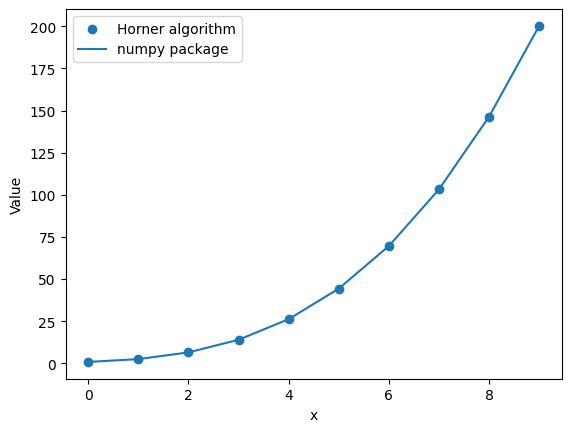

In [3]:
# Plot part is generated by Copilot
import matplotlib.pyplot as plt

# Scatter plot of p at x
plt.scatter(x, p, label='Horner algorithm')

# Polynomial plot
poly = np.poly1d(a[::-1])  # Create a polynomial object with coefficients in ascending order
plt.plot(x, poly(x), label='numpy package')

# Set labels and legend
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


**Remark**

- You might think the difference is not a big deal. What would you pursue if your numerical problem may end up evaluating polynomials millions or billions of times?
  - This is indeed true when you solve nonlinear PDE.

### Floating point representation

Take-aways

- How computers carry out computations
  - IEEE 754 Floating Point System
  - Loss of significance

#### IEEE 754 Floating Point Standard

![Scientific representation of a real number](https://fastbitlab.com/wp-content/uploads/2022/07/Figure-2-7-1536x793.png)

Figure: FastBitLab (Scientific representation of a real number)

![IEEE 754 Single Precision](https://i0.wp.com/circuitcellar.com/wp-content/uploads/2023/07/0067-Floating-Point_Representation_Feature_Image.png?w=1123&ssl=1)

Figure: Andrew Levido

The two figures describe different numbers.

**Summary**

- Real numbers are stored by a binary number system
  - $\pm 1 . b_1 b_2 \ldots b_n \times 2^e$
  - IEEE Rounding to Nearest Rule applies when store real numbers. (See below)
- Most common formats

| precision | sign ($s$) | exponent ($e$)| mantissa or <br> fraction ($b$) | total bits |
| :--- | :---: | :---: | :---: | :---: |
| single | 1 | 8 | 23 | 32 |
| double | 1 | 11 | 52 | 64 |
| long double | 1 | 15 | 64 | 80 |

Table source: Sauer (2017) p. 9.


**Remark** 

- From now on, we mostly focus on double precision otherwise mentioned.

**Terminology** 

- Radix point: $1010\underbrace{.}_{\text{this}}011_{(2)}$
- Normalized IEEE floating point number: The leading bit is 1.
  - Subnormal: The leading bit is 0.
- Left-justified: There is only one nonzero digit to the left of the radix point.
  - 1. ___ vs 11. ____


**Definition** (Machine epsilon)

The number *machine epsilon*, denoted $\epsilon_{\mathrm{mach}}$, is the distance between 1 and the smallest floating point number greater than 1. For the IEEE double precision floating point
standard, $\epsilon_{\mathrm{mach}} = 2^{−52}$.
- 1 - .99999.... = $2^{-52} = 2.2*10^{-16}$

**IEEE Rounding to Nearest Rule**

For double precision, if the 53rd bit to the right of the binary point is 0, then round
down (truncate after the 52nd bit). If the 53rd bit is 1, then round up (add 1 to the 52
bit), unless all known bits to the right of the 1 are 0’s, in which case 1 is added to bit
52 if and only if bit 52 is 1.

- ...1 0 --> ...1
- ...0 0 --> ...0
- ...1 1 --> ..10
- ...0 1 --> ...1

EXCEPTION:
- ...0 100000.... --> ...0
- ...1 100000.... --> ..10

Reference: Sauer (2017) p. 10.

**Remark** 

- The last part starting with "unless all known ..." is to ensure that the rounding up and down have equal probabilities, hence no bias.


**Notation**

Denote the IEEE double precision floating point number associated to $x$, using the
Rounding to Nearest Rule, by $\mathrm{fl}(x)$.

$\mathrm{fl}(x)$ is obtained as follows.

1. Convert $x$ to binary number.
2. Justify: Shift radix point to the right of the leftmost 1, and compensate with the exponent.
2. Round: Apply a rounding rule, such as the IEEE Rounding to Nearest Rule, to reduce
the mantissa to 52 bits.

**Definition** (Rounding errors)

Let $x_c$ be a computed version of the exact quantity $x$. Then,
$$
\text { (absolute) rounding error }=\left|x_c-x\right|,
$$
and
$$
\text { relative rounding error }=\frac{\left|x_c-x\right|}{|x|},
$$
if the latter quantity exists. 

**Theorem** (Relative rounding error)

In the IEEE machine arithmetic model, the relative rounding error of $\mathrm{fl}(x)$ is no more than one-half machine epsilon:

$$
\frac{|\mathrm{fl}(x)-x|}{|x|} \leq \frac{1}{2} \epsilon_{\text {mach }}
$$

Reference: Sauer (2017) p. 11

See [Remark (Computations with small numbers)](#computations-with-small-numbers) for an example of this bound.

#### Machine representation


**Double precision**

- $(-1)^{\text {sign }}\left(1 . b_{51} b_{50} \ldots b_0\right)_2 \times 2^{e-1023}$

![Double precision bits](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/IEEE_754_Double_Floating_Point_Format.svg/618px-IEEE_754_Double_Floating_Point_Format.svg.png)

- Exponent ranges $-1022 \le e \le 1023$.
  - 1023 is called *exponent bias*.
  - To account for negative exponents without storing extra bit for the sign

**Hexadecimal representation**

- Binary nunmbers are often represented by hexadecimal numbers.
- 4 bits $\longleftrightarrow$ 1 hexadecimal digit

|      Decimal | 0 | 1 |  2 |  3 |   4 |   5 |   6 |   7 |    8 |    9 |   10 |   11 |   12 |   13 |   14 |   15 |
|-------------:|--:|--:|---:|---:|----:|----:|----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| 4-bit Binary | 0 | 1 | 10 | 11 | 100 | 101 | 110 | 111 | 1000 | 1001 | 1010 | 1011 | 1100 | 1101 | 1110 | 1111 |
|  Hexadecimal | 0 | 1 |  2 |  3 |   4 |   5 |   6 |   7 |    8 |    9 |    A |    B |    C |    D |    E |    F |

  
$20 = 2*16 + 0*1$  
$1D = 1*16 + D*1$

**Example** 

Find computer-friendly representation of 9.4. More specifically, find its IEEE double precision floating point representation in binary and hexadecimal format.



Step 1: Convert to binary

(For an algorithmic way, see Sauer (2017) p. 6.)

- Integer part

$$
9 = 8 + 1 = 1000_{(2)} + 1_{(2)} = 1001_{(2)}
$$

- Fraction part 

$$
\begin{split}
0.4 =\frac{2}{5}&= \underbrace{0\cdot\frac{1}{2} + 1\cdot\frac{1}{2^2} + 1\cdot\frac{1}{2^3} + 0\cdot\frac{1}{2^4}}_{3/8 = 0.0110_{(2)}} + (\underbrace{\frac{4}{10} - \frac{3}{8}}_{1/40})\\
&= \underbrace{0.0110_{(2)} + \frac{1}{16} \cdot \frac{2}{5}}_{2/5\text{ (plug this in)}}
\\
&= 0.0110_{(2)} + 0.0001_{(2)}\cdot\left(\underbrace{0.0110_{(2)} + \frac{1}{16} \cdot \frac{2}{5}}_{2/5\text{ (plugged in)}}\right) 
\\
&= 0.0110_{(2)} + 0.00000110_{(2)} + (0.0001_{(2)})^2\cdot\left( 0.0110_{(2)} + \frac{1}{16} \cdot \frac{2}{5}\right) %0.0110_{(2)} + \underbrace{\frac{1}{40}}_{(1/16)\cdot (2/5)})
\\
&\quad\vdots
\\
&=0.\overline{0110}_{(2)}
\end{split}
$$



Therefore, 

$$
9.4 = 1001.\overline{0110}_{(2)}
$$


Step 2: Justify

$$
1001.\overline{0110}_{(2)} = 1.001\overline{0110}_{(2)}\times 2^3 %= 1.001\overline{0110}_{(2)}\times 2^{11_{(2)}}
$$

- Sign: $+$  $\longrightarrow$ $s=0$
- Exponent
  - $3=1026-1023=(1024+2) - \underbrace{1023}_{\text{bias}}$ $\longrightarrow$ $e=2^{10} + 2=100,0000,0010_{(2)}$
- Sign + Exponent
  - $0100,0000,0010_{(2)}=402_{(16)}$

Step 3: Round to obtain mantissa

$$
\begin{split}
&\quad 1.001\overline{0110}_{(2)} 
\\
&= 1.
\begin{array}{|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline 0010 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 \\
\hline
\end{array} 110\cdots
\\
&\approx 1.
\begin{array}{|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline 0010 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1101 \\
\hline
\end{array}
\end{split}
$$

Step 4: Convert the mantissa to hexadecimal (excluding the leading 1)

$$
\begin{aligned}
&\begin{array}{|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline 0010 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1101 \\
\hline
\end{array}\\
&\rightarrow(2 C C C C C C C C C C C D)_{16} .
\end{aligned}
$$

Altogether (sign bit) + (exponent bits) + (mantissa bits) reads

- (Hexadecimal) $4022 C C C C C C C C C C C D$ 
- (Binary) $\begin{array}{|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|l|}
\hline 0100 & 0000 & 0010 & 0010 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1100 & 1101 \\
\hline
\end{array}$

**Example** 

Use NumPy to check the IEEE 754 doulbe precision representation of 9.4.

- `ndarray.view(dtype)`: Shows reinterpretation of the array in the format of `dtype`. ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.view.html))
  - E.g., if `x = np.array(9.4)`, then `x.view(np.int64)` reinterpret the chunk of bit for 9.4, a 64-digit binary number, as an integer. In words, it says to NumPy "View `x` as integer."
- `numpy.binary_repr`: Return the binary representation of the input number as a string. ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.binary_repr.html))
  - If `width=64` is passed, the output consists of all 64 bits, including the first consecutive 0's.

In [1]:
import numpy as np
x = np.array(9.4)
print(f"{'Usual print of '              :>27}{x}{':'            :>13}{x.view(np.float64)}")
print(f"{'Float interpretation of '     :>27}{x}{':'            :>13}{x.view(np.float64)}")
print(f"{'Integer interpretation of '   :>27}{x}{' (base  2) :' :>13}{np.binary_repr(x.view(np.int64), width=64)}")
print(f"{'Integer interpretation of '   :>27}{x}{' (base 10) :' :>13}{x.view(np.int64)}")
print(f"{'Integer interpretation of '   :>27}{x}{' (base 16) :' :>13}{np.base_repr(x.view(np.int64), base=16)}")



            Usual print of 9.4            :9.4
   Float interpretation of 9.4            :9.4
 Integer interpretation of 9.4  (base  2) :0100000000100010110011001100110011001100110011001100110011001101
 Integer interpretation of 9.4  (base 10) :4621481347616918733
 Integer interpretation of 9.4  (base 16) :4022CCCCCCCCCCCD


##### Special exponent

- $e=2047=111,1111,1111_{(2)}$ is used to express abnormal quantities.
  - $s=0$ $\longrightarrow$ $se=0111,1111,1111_{(2)}=7FF_{(16)}$
  - $s=1$ $\longrightarrow$ $se=1111,1111,1111_{(2)}=FFF_{(16)}$

| machine number | example | hex format |
| :---: | ---: | :---: |
| + Inf | $1 / 0$ | 7FF0000000000000 |
| - Inf | $-1 / 0$ | FFF0000000000000 |
| NaN | $0 / 0$ | FFFxxxxxxxxxxxxx |

Here, x means any digit not all of which are zero.



- $e=0=000,0000,0000_{(2)}$ is used to represent very small numbers.
  - In this case **only**, the omitted bit to the right of radix point is assumed to be 0, not 1. 
    - Consequently, the floating point representation means $\pm 0 . b_1 b_2 \ldots b_{52} \times 2^{-1022}$. (Sauer (2017) p. 13)
    - Those numbers are called *subnormal* floating point numbers.
  - Subnormal numbers include $0$.
    - In fact, many computing system uses two zeros: `0` and `-0` depending on the sign bit.
  - The exponent is the same, -1022, in the case $e=1=000,000,0001_{(2)}$ after subtracting the exponent bias $1023$. However, the actual effect is as if $(\text{base})\times 2^{-1023}$ because the leading digit is 0, not 1. (Instructor's comment)
  - The smallest possible positive number of double precision is $2^{-52}\times 2^{-1022}=2^{-1074}$, which is represented with 0 exponent
  
$$
\begin{array}{|l|l|l|l|}
\hline 0 & 00000000000 & 0000000000000000000000000000000000000000000000000001 \\
\hline
\end{array}
$$
  

In [61]:
import numpy as np
i = 1
x = np.array(1, dtype=np.int64)
print(x.view(np.float64))

# flip the sign bit
# 1 is at the first (sign) and the last bits (mantissa)
y = x + np.left_shift(x, 63)
print(f"{'Ex1   (bit): '    :>13}{np.binary_repr(y, width=64)}")
print(f"{'(float): '  :>13}{y.view(np.float64)}")

# 0.1*2^(-1022) = 1.0*2^(-1023)
# 1 is at the leftmost bit of the mantissa (0 exponent; subnormal)
y = np.left_shift(x, 51)
print(f"{'Ex2   (bit): '    :>13}{np.binary_repr(y, width=64)}")
print(f"{'(float): '  :>13}{y.view(np.float64)}")

# 1.0*2^(-1022)
# 1 is at the rightmost bit of the exponent (1 exponent; normalized)
y = np.left_shift(x, 52)
print(f"{'Ex3   (bit): '    :>13}{np.binary_repr(y, width=64)}")
print(f"{'(float): '  :>13}{y.view(np.float64)}")



5e-324
Ex1   (bit): 1000000000000000000000000000000000000000000000000000000000000001
    (float): -5e-324
Ex2   (bit): 0000000000001000000000000000000000000000000000000000000000000000
    (float): 1.1125369292536007e-308
Ex3   (bit): 0000000000010000000000000000000000000000000000000000000000000000
    (float): 2.2250738585072014e-308


**Remark** (Machine epsilon and smallest numbers)

- $\epsilon_{\text {mach }}=2^{-52}$ is the smallest distinguishable size between numbers in the order of unit, 1.
- The smallest-representable number, $2^{-1074}$ is the smallest quantity that can ever be representable: smaller values than that are treated as 0.
- $\epsilon_{\text {mach }}=2^{-52}$ and $2^{-1074}$ are different.
  - $\epsilon_{\text {mach }}$ originates from the mantissa while $2^{-1074}$ is determined by the mantissa and the exponent.
  - There are many numbers that are smaller than $\epsilon_{\text {mach }}$ and represented by IEEE 754 double precision.

**Remark** (Overflow and underflow)

- Overflow refers to when the result is too large to be stored. 
  - They are usually stored as `Inf`, `-Inf`, or `NaN`.
- Underflow refers to when the result is too small te be represented.
  - They are usually stored as 0.

#### Addtion of floating point numbers

**Algorithm** (Machine addition)

- Given two numbers
- Line up the decimal points
- Add the two numbers
- Store the result

**Remark** (Machine addition)

- Actual addition can be conducted in higher precision than 52 bits: it takes place in a dedicated register. (Sauer (2017) p. 14)
- But the result is rounded to 52 bits of mantissa.

**Example**

$1 + 2^{-53}=1$ in double precision.

$$
\begin{aligned}
& =1.\begin{array}{|l|lr|}
\hline 0000000000000000000000000000000000000000000000000000 & \  &\times 2^0 \\
\hline
\end{array}
\\
& + 0.\begin{array}{|l|ll|}
\hline
0000000000000000000000000000000000000000000000000000 & 1 & \times 2^0 \\
\hline
\end{array}
\\
& =1.\begin{array}{|l|ll|}
\hline
0000000000000000000000000000000000000000000000000000 & 1 & \times 2^0 \\
\hline
\end{array}
\end{aligned}
$$

In [64]:
x = 1.0
y = 2**(-53)
z = 2**(-52)

print(f"{'x: ' :>5}{x}")
print(f"{'y: ' :>5}{y}")
print(f"{'z: ' :>5}{z}")
print(f"{'x+y: ' :>5}{x+y}")
print(f"{'x+z: ' :>5}{x+z}")

  x: 1.0
  y: 1.1102230246251565e-16
  z: 2.220446049250313e-16
x+y: 1.0
x+z: 1.0000000000000002


**Remark** (Computation errors)

- Due to rounding and truncations, computer arithemetic sometimes gives surprising results. For example, if a double precision computer with IEEE rounding to nearest is asked to store 9.4, then subtract 9, and then subtract 0.4, the result will be something other than zero.

In [65]:
x = 9.4
y = x - 9.4
z = x - 9.0
z = z - 0.4

print(f"{'x: ' :>5}{x}")
print(f"{'y: ' :>5}{y}")
print(f"{'z: ' :>5}{z}")

  x: 9.4
  y: 0.0
  z: 3.3306690738754696e-16


###### Computations with small numbers

**Remark** (Computations with small numbers)

- The fact that $\epsilon_{\text {mach }}=2^{-52}$ does not mean that numbers smaller than $\epsilon_{\text {mach }}$  are negligible in the IEEE model. As long as they are representable in the model, computations with numbers of this size are just as accurate, assuming that they are not added or subtracted to numbers of unit size.

In [68]:
r = 1e-20
x = 9.4 * r
y = x - (9.4 * r)
z = x - (9.0 * r)
z = z - (0.4 * r)

print(f"{'x: ' :>5}{x}")
print(f"{'y: ' :>5}{y}")
# The computing error is not of order of machine epsilon,
# but it is compatible with (x * e_mach)
print(f"{'z: ' :>5}{z}")

  x: 9.4e-20
  y: 0.0
  z: 1.2789378536946488e-35


#### Loss of significance